## Observations and Insights 

#### Based on the data, Ramicane had the lowest average Tumor Volume
#### We can see, in one case study, Capomulin virtually halved the Tumor Volume in one mouse over a span of 45 time points.
#### Looking at our correlation coefficient and linear regression model, we can see that that Weight and Tumor Volume have a positive correlation. 

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset #used default inner join to remove rows with NaN values
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [159]:
# Checking the number of mice.
len(merge_df["Mouse ID"].value_counts())

249

In [160]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [161]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df.duplicated(["Mouse ID","Timepoint"],keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [162]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#we received value 'g989' based on our previous output
merge_df.drop(merge_df.loc[merge_df["Mouse ID"]== 'g989'].index, inplace=True)

In [163]:
# Checking the number of mice in the clean DataFrame.
len(merge_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#group by Drug Regimen
grouped_df = merge_df.groupby("Drug Regimen")
# calculate mean
sum_mean = round(grouped_df["Tumor Volume (mm3)"].mean(), 2) 
#calculate media
sum_median = round(grouped_df["Tumor Volume (mm3)"].median(), 2) 
#calculate variance
sum_var = round(grouped_df["Tumor Volume (mm3)"].var(), 2)
#calculate standard deviation
sum_std = round(grouped_df["Tumor Volume (mm3)"].std(), 2)
#calculate standard error of mean
sum_sem = round(grouped_df["Tumor Volume (mm3)"].sem(), 2)
#place out calculations in a new data frame
summary_df = pd.DataFrame({"Tumor Volume Mean": sum_mean,
                           "Tumor Volume Median": sum_median,
                           "Tumor Volume Variance": sum_var,
                           "Tumor Vol. Standard Deviation": sum_std,
                           "Tumor Volume SEM": sum_sem})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Vol. Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [165]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#not a single line, but I was having issues with nested rename in .agg
agg_sum_df = round(grouped_df["Tumor Volume (mm3)"].agg(['mean', 'median','var', 'std', 'sem']), 2)
#use .rename for clean formatting
agg_rename = agg_sum_df.rename(columns={'mean':'Tumor Volume Mean', 'median':'Tumor Volume Median','var':'Tumor Volume Variance', 'std':'Tumor Vol. Standard Deviation', 'sem':'Tumor Volume SEM'})
agg_rename

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Vol. Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

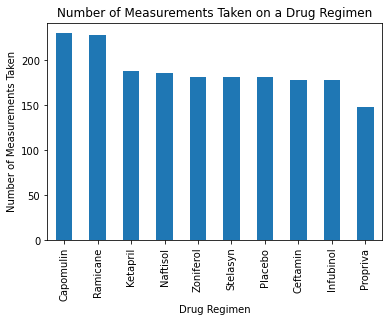

In [166]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# use .value_counts to find the amount of times a regimen was measured
measurement_data = merge_df["Drug Regimen"].value_counts()
#plot in a bar chart with title and labels
measurement_data.plot(kind ='bar')
plt.title("Number of Measurements Taken on a Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.xlabel("Drug Regimen")
plt.show()

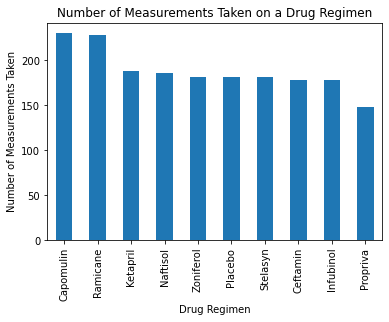

In [167]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#group by drug regimen and count
drug_regi_data = pd.DataFrame(merge_df.groupby('Drug Regimen').count())
#sort in descending order
sorted_regi_data = drug_regi_data.sort_values('Mouse ID', ascending =False)
#find the number of values for the x-axis
x_axis = np.arange(len(sorted_regi_data))
#define tick location per value in x-axis
tick_locations = [value for value in x_axis]
#plot tick markers
plt.xticks(tick_locations, sorted_regi_data.index.values, rotation="vertical")
#plot bar graph, using the count in Mouse ID to represent number of measurements 
plt.bar(x_axis, sorted_regi_data["Mouse ID"], width= .5)
#plot title, labels and xlim
plt.title("Number of Measurements Taken on a Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.xlabel("Drug Regimen")
plt.xlim(-0.50, len(x_axis)-.50)
plt.show()

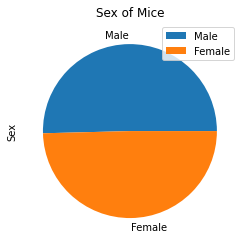

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#find female values and count per unique mouse ID
female = merge_df.loc[merge_df['Sex'] == 'Female']
female_count = len(female['Mouse ID'].unique())
#find male values and count per unique mouse ID
male = merge_df.loc[merge_df['Sex'] == 'Male']
male_count = len(male['Mouse ID'].unique())
#create new data frame for your counts. rename index
sex_df = pd.DataFrame({"Total Count":[male_count, female_count]})
sex_df = sex_df.rename({0: 'Male', 1: 'Female'}, axis='index')
#plot pie chart, title and label y-axis
sex_plot = sex_df.plot(kind='pie', y= 'Total Count', title='Sex of Mice')
sex_plot.set_ylabel('Sex')
plt.show()

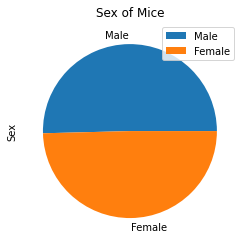

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#find female values and count per unique mouse ID
female = merge_df.loc[merge_df['Sex'] == 'Female']
female_count = len(female['Mouse ID'].unique())
#find male values and count per unique mouse ID
male = merge_df.loc[merge_df['Sex'] == 'Male']
male_count = len(male['Mouse ID'].unique())
#create new data frame for your counts. rename index
sex_df = pd.DataFrame({"Total Count":[male_count, female_count]})
sex_df = sex_df.rename({0: 'Male', 1: 'Female'}, axis='index')
#plot pie chart,title, label y-axis, and legend
plt.pie(sex_df['Total Count'], labels=sex_df.index.values)
plt.title("Sex of Mice")
plt.ylabel("Sex")
plt.legend(loc="upper right")
plt.show()

## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#dropped duplicates in the df except for the greatest value in Timepoint per Mouse ID
timepoint_df = merge_df.sort_values('Timepoint').drop_duplicates('Mouse ID', keep='last')
timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1216,n482,Propriva,Female,4,29,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
1315,o848,Stelasyn,Female,14,27,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
851,f932,Ketapril,Male,15,29,0,45.000000,0
...,...,...,...,...,...,...,...,...
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1763,x402,Stelasyn,Male,21,28,45,61.619606,3
59,s508,Ramicane,Male,1,17,45,30.276232,0
360,g316,Capomulin,Female,22,22,45,40.159220,2


In [171]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatment:
    vol_data_by_reg = timepoint_df['Tumor Volume (mm3)'].loc[timepoint_df['Drug Regimen'] == regimen] 
    
    # add subset 
    vol_data.append(vol_data_by_reg)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol_data_by_reg.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    print(f'For {regimen} IQR is {iqr}')
    print(f'For {regimen} values below {lower_bound} are possible outliers')
    print(f'For {regimen} values above {upper_bound} are possible outliers\n')
    
#per data below and box plot we can see that 1 value for Indubinol is below 36.83

For Capomulin IQR is 7.78
For Capomulin values below 20.71 are possible outliers
For Capomulin values above 51.83 are possible outliers

For Ramicane IQR is 9.1
For Ramicane values below 17.91 are possible outliers
For Ramicane values above 54.31 are possible outliers

For Infubinol IQR is 11.48
For Infubinol values below 36.83 are possible outliers
For Infubinol values above 82.75 are possible outliers

For Ceftamin IQR is 15.58
For Ceftamin values below 25.35 are possible outliers
For Ceftamin values above 87.67 are possible outliers



<ipython-input-182-408e9219e684>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatment)


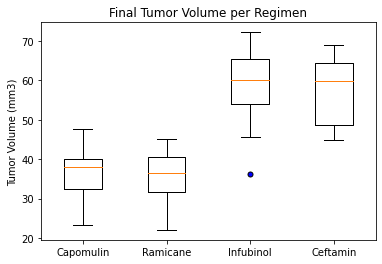

In [182]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#dictionary for custom marker to use as an argument in .boxplot
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5)
# plot box plot, title, and labels. use flierprops to customize oulier
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(treatment)
ax.boxplot(vol_data, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

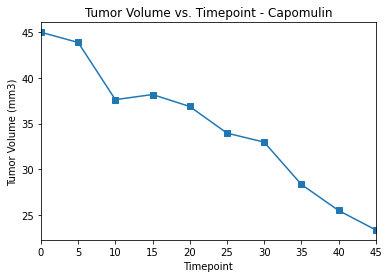

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#in the last portion of the homework we dropped some rows. we will create a data frame based on the .csv's to recreate our original data
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#filter by Capomulin
capomulin_df = df.loc[df["Drug Regimen"] == 'Capomulin']
#filter capomulin data by a particular mouse ID. We received this Mouse ID from previous outputs
mouse_cap_df = capomulin_df.loc[capomulin_df["Mouse ID"] == 's185']
#define x-axis
x_axis = mouse_cap_df['Timepoint']
#define y-axis
y_axis = mouse_cap_df['Tumor Volume (mm3)']
#plot line graph, title, labels, and xlim. 
plt.title("Tumor Volume vs. Timepoint - Capomulin")
plt.plot(x_axis, y_axis, marker="s")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim(0, 45)
plt.show()

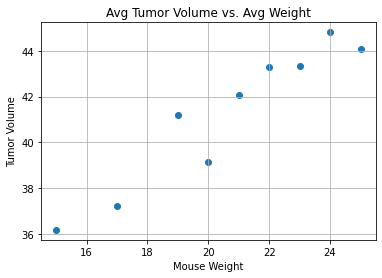

In [174]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#group by weight
grouped_weight = capomulin_df.groupby('Weight (g)')
#get the average value of columns grouped by weight
avg_tumor_df = grouped_weight.mean()
#x_axis is our index - weight
x_axis = avg_tumor_df.index
#y_axis is tumor volume
y_axis = avg_tumor_df['Tumor Volume (mm3)']
#plot, add labels, title, and grid
plt.scatter(x_axis, y_axis)
plt.title('Avg Tumor Volume vs. Avg Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.grid()
plt.show()

## Correlation and Regression

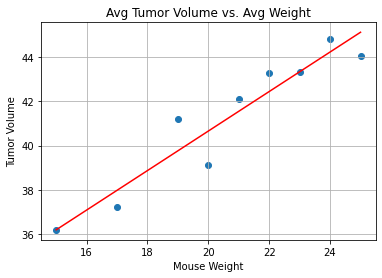

The correlation coefficient of Mouse Weight and Tumor Volume is 0.95
The Linear Regression Equation is y = 0.89x + 22.76


In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
#use the above code to calculate your linear regression equation. we will print this later. 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter plot, linerar regression model, title, labels, and grid
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis)
plt.title('Avg Tumor Volume vs. Avg Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.grid()
plt.show()
#print our findings
print(f"The correlation coefficient of Mouse Weight and Tumor Volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
print(f"The Linear Regression Equation is {line_eq}")